In [1]:
%matplotlib widget

import os
import sys

PATH = r"C:\Users\leona\OneDrive - Universität Zürich UZH\usefulFunction\scripts"
sys.path.append(PATH)

from generate_rixs_spectra import TPS_Image, RIXS_Run

Files to be used:
rixs_20250313_81_001.hdf5
Elapsed time: 0.00 seconds. 

Careful: Curvature extraction is disabled and the given slope is zero
Performing single photon counting and curvature correction...
Found 6 images in the file rixs_20250313_81_001.hdf5
Elapsed time: 2.47 seconds. 

Normalization factor: 7.914000000000001 +- 0.0
Attempting to find the range around the elastic line...
Using range: 2751, 2866
Only one file found. No energy correlation necessary.


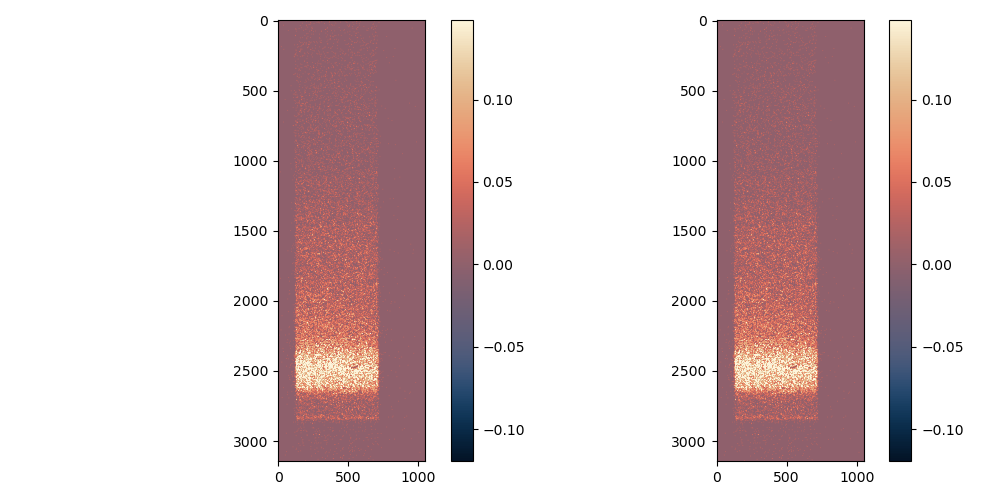

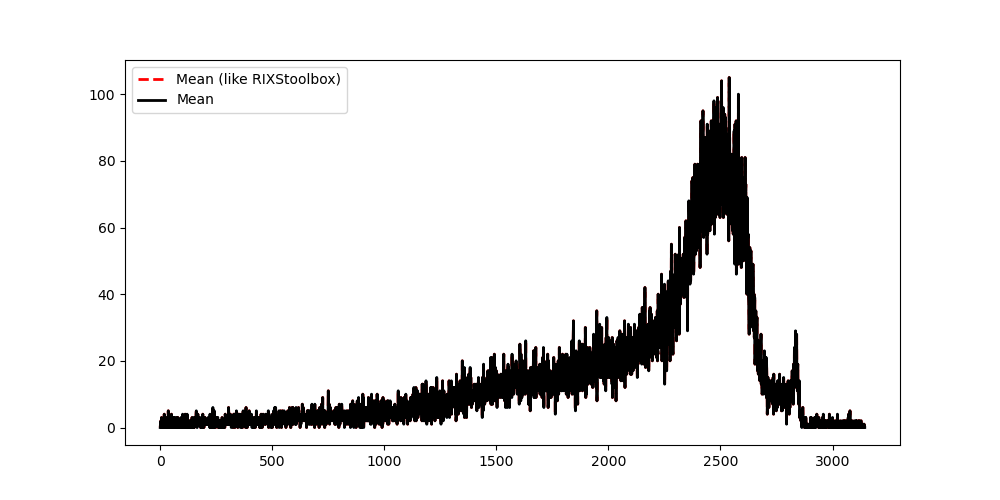

In [2]:
facility = "TPS"

folder = r"C:\Users\leona\OneDrive - Universität Zürich UZH\deepL_SPC\TPS_spc_test_data\img"
exp_number = "QISI_trial"
date="20250313"
run_numbers = [81]
curve_a=0
curve_b=0
calibration = 2.1
roi_x = (150,1200)
roi_y = (50,1900)

subdivide_bins_factor_x=1
subdivide_bins_factor_y=1.7
factor_ADC = 0.55
subtract_background_from_img = False
subtract_background_from_corner = True
background_pre_processed_path = r"F:\Leo_LKedge_TPS_h5_testsamples\avg_dark_img_200.hdf5"

find_aligning_range = True
pixel_row_start = 920
pixel_row_stop = 1020
fit_shifts = False
correlation_batch_size=3
poly_order=2
plot_raw_image = False

save_path_dir = r"F:\Taiwan_2024\img (1)\processed_images"
auto_alignment = True
index_elastic_line=None

for run_number in run_numbers:

    analysis_run = RIXS_Run(
        facility=facility,
        folder=folder,
        identifier_string=date,
        run_number=run_number,
        exp_number=exp_number,
    )   

    imgs_lc = analysis_run.process_images(
        curve_a=curve_a,
        curve_b=curve_b,
        factor_ADC=factor_ADC,
        calibration=calibration,
        roi_x=roi_x,
        roi_y=roi_y,
        subdivide_bins_factor_x=subdivide_bins_factor_x,
        subdivide_bins_factor_y=subdivide_bins_factor_y,
        subtract_background_from_img=subtract_background_from_img,
        subtract_background_from_corner=subtract_background_from_corner,
        background_pre_processed_path=background_pre_processed_path,
        find_aligning_range=find_aligning_range, 
        pixel_row_start=pixel_row_start, pixel_row_stop=pixel_row_stop,
        fit_shifts=fit_shifts, correlation_batch_size=correlation_batch_size,poly_order=poly_order,
        plot_raw_image=plot_raw_image
        )

    analysis_run.plot_image_and_spectra(plot_image=True)

    # analysis_run.save_txt_rixs_spectra(path_dir = save_path_dir, filename_save_auto = True, 
                                    #    auto_alignment=auto_alignment, index_elastic_line=index_elastic_line)
    
    # analysis_run.save_pre_processed_dataset(path_dir=save_path_dir, filename_save_auto=True,
                                            # auto_alignment=auto_alignment, index_elastic_line=index_elastic_line)
